﻿# Fashion-MNIST

好了，我们来实战演练。你将使用 [Fashion-MNIST 数据集](https://github.com/zalandoresearch/fashion-mnist)。对于神经网络来说，MNIST 的规模很小，可以轻松地达到 97% 的准确率。Fashion-MNIST 包括很多 28x28 灰色服饰图像。它比 MNIST 更复杂，也更贴近实际现实需求。

<img src='assets/fashion-mnist-sprite.png' width=500px>

你要在这个 notebook 里构建神经网络。其实你可以用 Part 3 notebook 里的代码，但是这样就学不到任何知识了。只有自己编写代码并确保代码能运行，才能实现最佳学习效果。当然，你可以参考 Part 3 notebook。

首先，通过 torchvision 加载数据集。

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Processing...
Done!


In [ ]:
Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz
Processing...
Done!


下面是一个图像示例。

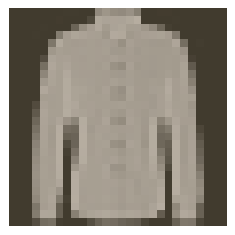

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

![png](output_3_0.png)


## 构建网络

你要先定义网络。和 MNIST 一样，每个图像是 28x28 = 784 像素，并且有 10 个类别。你应该至少包含一个隐藏层。建议对层级使用 ReLU 激活函数，并返回前向传播的对数或 log-softmax。你可以决定添加多少个层级以及这些层级的大小。

In [6]:
# TODO: Define your network architecture here
from torch import nn
import torch.nn.functional as F
from torch import optim

In [13]:
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))

# 训练网络

现在，来试试创建并训练网络。首先，你需要定义[条件](http://pytorch.org/docs/master/nn.html#loss-functions)（例如 `nn.CrossEntropyLoss`）和[优化器](http://pytorch.org/docs/master/optim.html)（通常是 `optim.SGD` 或 `optim.Adam`）。

然后编写训练代码。你可以参考这个流程：

*通过网络进行正向传递以获取logits 
*使用 logits 计算损失
* 通过 `loss.backward()` 在网络中反向传播以计算梯度
* 使用优化器更新权重

通过调整参数（隐藏单元、学习速率等），你应该能够使训练损失低于 0.4。

In [17]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.NLLLoss()
# criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

In [18]:
# TODO: Train the network here
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        
        running_loss += loss.item()
        optimizer.step()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5089357204989456
Training loss: 0.40213974562090343
Training loss: 0.3748870015239665
Training loss: 0.3510171377312527
Training loss: 0.34085509567849165


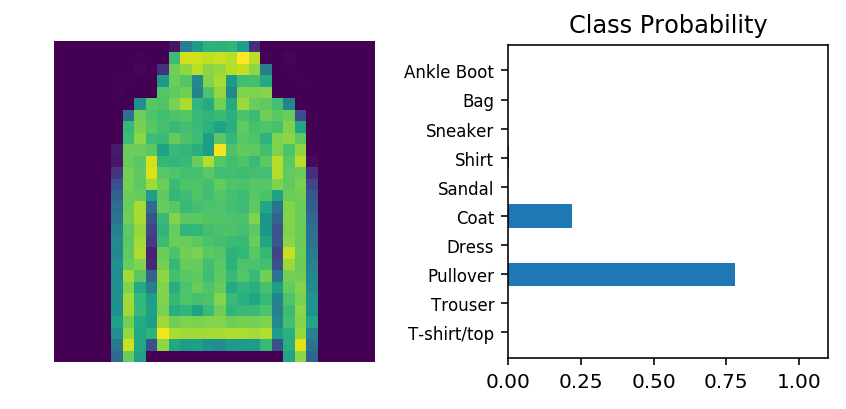

In [29]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logits = model.forward(img)
ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')